In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
from scipy.stats import dweibull
import statistics

In [11]:
df22=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df22.drop(['Longitude','Latitude','Wind Direction (Degrees True)',"Barometric Pressure (Millibars)","Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,29.6894,251.5,27.0
1607,19/02/2016 10:09:15,6.2,29.6865,240.2,23.4
1608,19/02/2016 10:14:15,6.2,29.6835,248.6,25.1
1609,19/02/2016 10:19:15,6.3,29.6835,246.7,25.7


In [12]:

df2=df1.loc[df1.loc[:,'SensorTimestamp'] >= '17/08/2015']
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
824,17/08/2015 00:01:33,12.5,30.0350,150.9,5.2
825,17/08/2015 00:06:33,12.6,30.0350,159.8,6.6
826,17/08/2015 00:11:34,13.0,30.0290,153.8,6.3
827,17/08/2015 00:16:34,12.9,30.0290,156.6,6.0
828,17/08/2015 00:21:35,12.4,30.0261,133.0,3.8
...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,29.6894,251.5,27.0
1607,19/02/2016 10:09:15,6.2,29.6865,240.2,23.4
1608,19/02/2016 10:14:15,6.2,29.6835,248.6,25.1
1609,19/02/2016 10:19:15,6.3,29.6835,246.7,25.7


In [13]:
df3=df2.loc[df2.loc[:,'SensorTimestamp'] <='18/08/2015']
df3

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
824,17/08/2015 00:01:33,12.5,30.0350,150.9,5.2
825,17/08/2015 00:06:33,12.6,30.0350,159.8,6.6
826,17/08/2015 00:11:34,13.0,30.0290,153.8,6.3
827,17/08/2015 00:16:34,12.9,30.0290,156.6,6.0
828,17/08/2015 00:21:35,12.4,30.0261,133.0,3.8
...,...,...,...,...,...
1067,17/08/2015 23:36:35,12.2,30.0409,144.4,2.3
1068,17/08/2015 23:41:36,12.1,30.0409,153.5,3.5
1069,17/08/2015 23:46:36,12.2,30.0438,147.1,3.7
1070,17/08/2015 23:51:36,12.2,30.0438,138.8,4.9


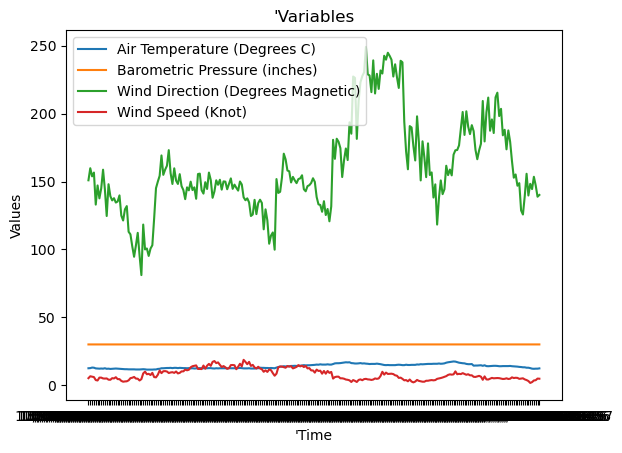

In [14]:
sns.lineplot(data=df3, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df3, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df3, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df3, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("'Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()
plt.show()

In [15]:
df3.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,248.000000,248.000000,248.000000,248.000000
mean,13.890323,30.033748,159.831048,8.033468
std,1.595257,0.014599,34.247455,4.069653
min,11.500000,30.008400,81.100000,1.700000
25%,12.500000,30.023100,139.100000,4.700000
50%,14.000000,30.032000,151.200000,7.000000
75%,15.200000,30.040900,178.350000,11.175000
max,17.500000,30.070400,249.100000,18.700000


In [16]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")

In [37]:
# Load the dataset
data = np.loadtxt('data.csv')

# Calculate the mean and variance of the dataset
mean = np.mean(data)
variance = np.var(data)

# Calculate the shape and scale parameters of the standard gamma distribution
k = (mean / variance) ** 2
theta = variance / mean

# Print the shape and scale parameters
print('Shape parameter (k) =', k)
print('Scale parameter (theta) =', theta)

Shape parameter (k) = 41.0881375598453
Scale parameter (theta) = 0.1560061689447038


<AxesSubplot:xlabel='Synthesised air nor', ylabel='Density'>

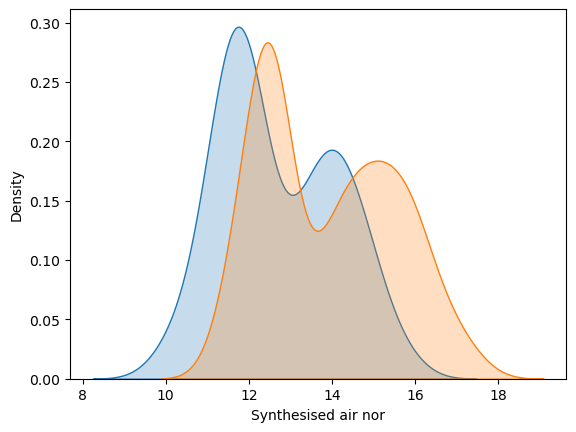

In [38]:

np.random.seed(54)
#45,48
ts40 = pd.DataFrame(data = dweibull.rvs(2,12.801, 1.415,len(idx1)),index =idx1, columns=['Synthesised air nor'])

sns.kdeplot(ts40['Synthesised air nor'],shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

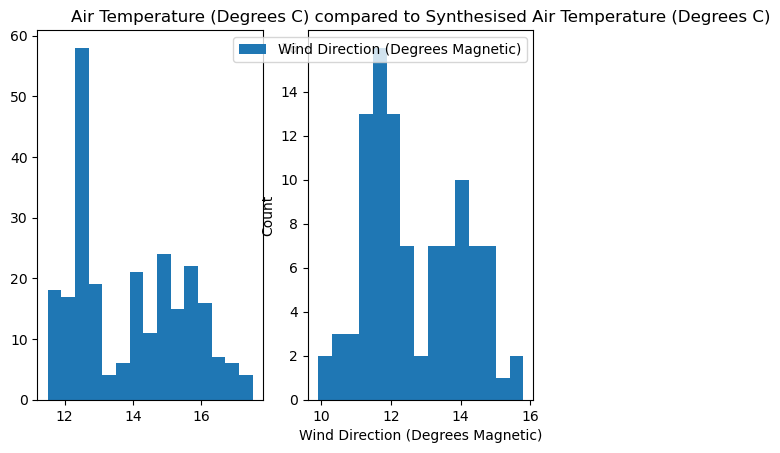

In [39]:
plt.subplot(1,2,1)
#df3.hist('Wind Direction (Degrees Magnetic)')
plt.hist(df3["Air Temperature (Degrees C)"], bins =15)
plt.subplot(1,2,2)
#ts4.hist("Synthesised Wind Direction (Degrees Magnetic)")
plt.hist(ts40["Synthesised air nor"], bins =15)
plt.title("Air Temperature (Degrees C) compared to Synthesised Air Temperature (Degrees C)")
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.legend(["Wind Direction (Degrees Magnetic)", "Synthesised Wind Direction (Degrees Magnetic)"])
plt.show()


In [40]:
rng=np.random.default_rng(seed=57)
#rng4 = np.random.default_rng()
mu1, sigma1 = 168.14, 32.27
ts4 = pd.DataFrame(data=rng.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

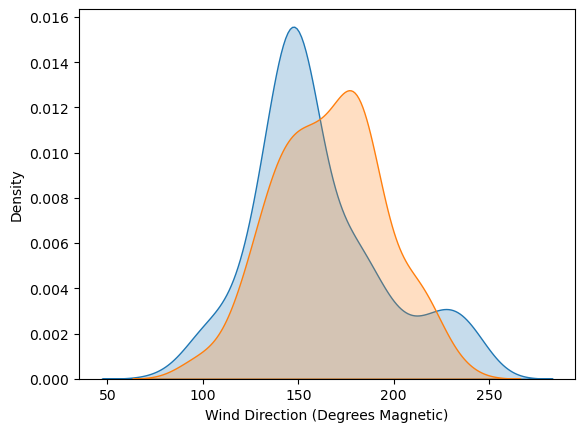

In [41]:
sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True, label="actual")
sns.kdeplot(ts4['Synthesised Wind Direction (Degrees Magnetic)'],shade=True, label="simulated")

<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

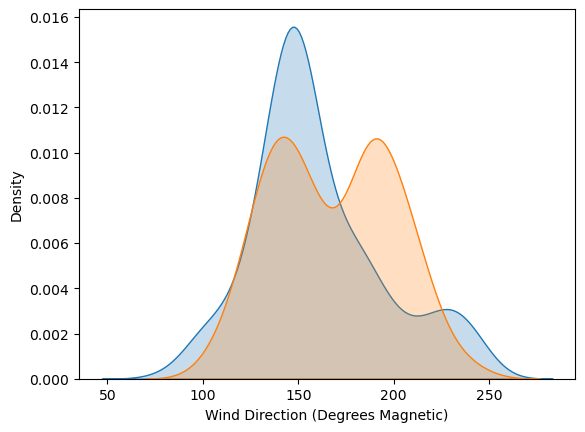

In [42]:
np.random.seed(40)
#45,48
ts40 = pd.DataFrame(data = dweibull.rvs(2,168.141, 32.27,len(idx1)),index =idx1, columns=['Synthesised mag'])


sns.kdeplot(df3['Wind Direction (Degrees Magnetic)'],shade=True)
sns.kdeplot((ts40['Synthesised mag']),shade=True)

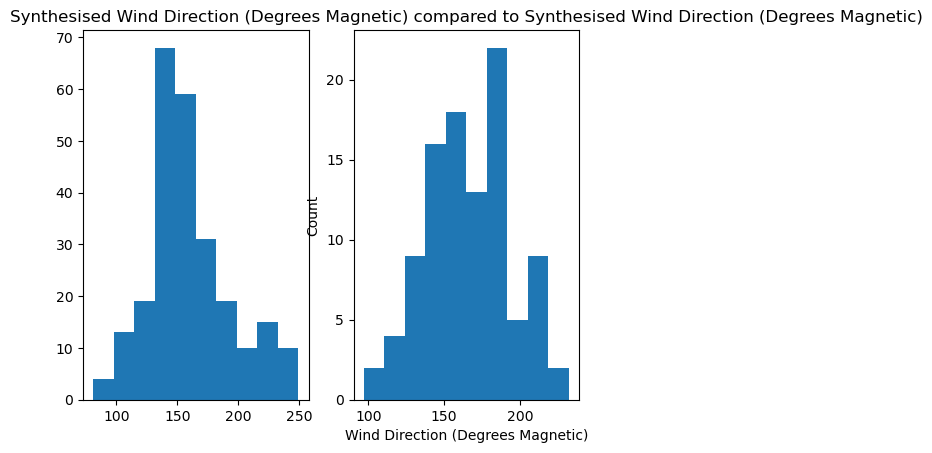

In [43]:
plt.subplot(1,2,1)
#df3.hist('Wind Direction (Degrees Magnetic)')
plt.hist(df3["Wind Direction (Degrees Magnetic)"], bins =10)
plt.subplot(1,2,2)
#ts4.hist("Synthesised Wind Direction (Degrees Magnetic)")
plt.hist(ts4["Synthesised Wind Direction (Degrees Magnetic)"])
plt.title("Synthesised Wind Direction (Degrees Magnetic) compared to Synthesised Wind Direction (Degrees Magnetic)")
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
#plt.legend(["Wind Direction (Degrees Magnetic)", "Synthesised Wind Direction (Degrees Magnetic)"], align="right")
plt.show()

In [44]:
rng=np.random.default_rng(53)
#rng1 = np.random.default_rng()
mu1, sigma1 = 13.728, 5.78
ts101 = pd.DataFrame(data=rng.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised knot'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

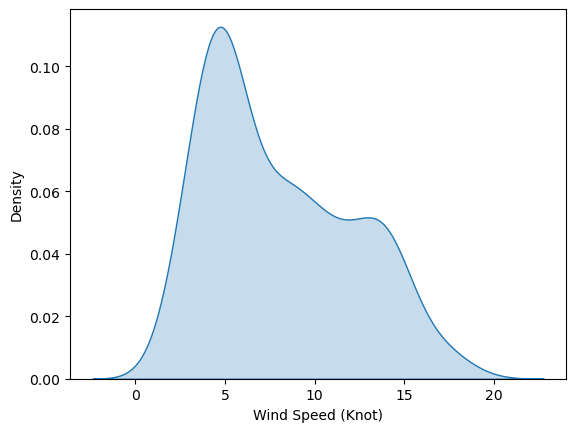

In [45]:
sns.kdeplot(df3['Wind Speed (Knot)'],shade=True)
sns.kdeplot((ts101['Synthesised knot']),shade=True)

In [46]:
rng=np.random.default_rng(seed=58)
#mu, sigma = 0, 0.1 # mean and standard deviation #56,57
#ts4 = pd.DataFrame(data=rng4.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])
ts5 = pd.DataFrame(data=rng.normal(29.962, .034,len(idx1)),index =idx1, columns=['Synthesised Barometric Pressure (inches)'])

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

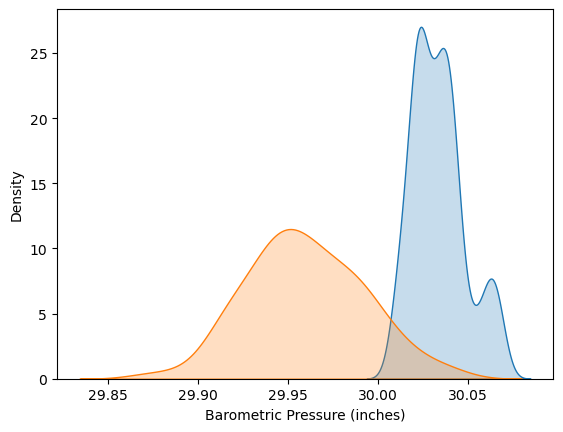

In [47]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True, label="actual")
sns.kdeplot(ts5['Synthesised Barometric Pressure (inches)'],shade=True, label="simulated")

In [48]:
left = 11
mode = 12.25
right = 17.5
rng=np.random.default_rng(seed=56)

# Generate a random sample of size 1000 from the triangular distribution
d3 = pd.DataFrame(data = rng.triangular(left, mode, right, size=100),index = idx1, columns = ["Synthesised Air Temperature (Degrees C)"])

In [49]:
np.random.seed()
#45,48
ts420 = pd.DataFrame(data = dweibull.rvs(2,29.96, .034,len(idx1)),index =idx1, columns=['Synthesised mag'])

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

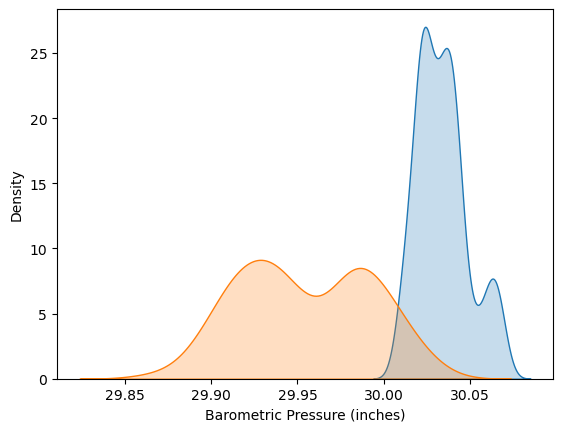

In [50]:
sns.kdeplot(df3['Barometric Pressure (inches)'],shade=True, label="actual")
sns.kdeplot((ts420['Synthesised mag']),shade=True)

In [51]:
import numpy as np
from scipy.stats import weibull_min

# Example usage
data = np.genfromtxt('data.csv', delimiter=',')
shape, loc, scale = weibull_min.fit(data, floc=0)
print(f"Shape: {shape:.2f}, Scale: {scale:.2f}, loc: {loc:.2f}")

Shape: 8.52, Scale: 13.46, loc: 0.00


<AxesSubplot:xlabel='Synthesised air nor', ylabel='Density'>

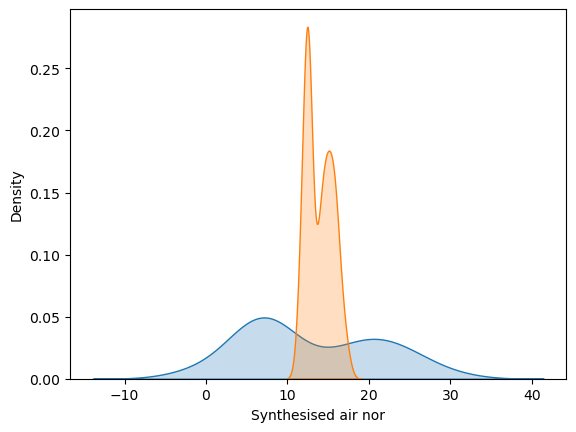

In [61]:
np.random.seed(54)
#45,48
ts40 = pd.DataFrame(data = dweibull.rvs(2,13.46,8.5,len(idx1)),index =idx1, columns=['Synthesised air nor'])

sns.kdeplot(ts40['Synthesised air nor'],shade=True)
sns.kdeplot(df3['Air Temperature (Degrees C)'],shade=True)

In [62]:
#ore info on FAQ.

import numpy as np
from scipy.optimize import fmin
from scipy.stats import exponweib

def fitweibull(x):
    def optfun(theta):
        return -np.sum(np.log(exponweib.pdf(x, 1, theta, scale=theta, loc=0)))
    logx = np.log(x)
    shape = 1.2 / np.std(logx)
    scale = np.exp(np.mean(logx) + (0.572 / shape))
    return fmin(optfun, [shape, scale], xtol=0.01, ftol=0.01, disp=0)

# Example usage
data = np.array([29.9168, 29.9227, 29.9198, 29.9198, 29.9198, 29.9198, 29.9198, 29.9198, 29.9168, 29.9168, 29.9227, 29.9257, 29.9316, 29.9286, 29.9375, 29.9345, 29.9375, 29.9405, 29.9345, 29.9345, 29.9257, 29.9286, 29.9316, 29.9257, 29.9316, 29.9257, 29.9286, 29.9257, 29.9227, 29.9198, 29.9198, 29.9109, 29.908, 29.9109, 29.9198, 29.9168, 29.9198, 29.9257, 29.9227, 29.9139, 29.9109, 29.9109, 29.9109, 29.9109, 29.9139, 29.9109, 29.9109, 29.9139, 29.9139, 29.9139, 29.9198, 29.9139, 29.9198, 29.9168, 29.9227, 29.9198, 29.9139, 29.9198, 29.9139, 29.9198, 29.9227, 29.9139, 29.9168, 29.9139, 29.9168, 29.9168, 29.9198, 29.9198, 29.9286, 29.9345, 29.9345, 29.9286, 29.9286, 29.9286, 29.9286, 29.9286, 29.9316, 29.9345, 29.9316, 29.9316, 29.9286, 29.9286, 29.9345, 29.9405, 29.9375, 29.9375, 29.9434, 29.9434, 29.9434, 29.9405, 29.9434, 29.9464, 29.9493, 29.9434, 29.9464, 29.9434, 29.9493, 29.9493, 29.9523, 29.9434, 29.9493, 29.9434, 29.9493, 29.9523, 29.9582, 29.9523, 29.9582, 29.9582, 29.9582, 29.9611, 29.9611, 29.9582, 29.9641, 29.9641, 29.97, 29.967, 29.97, 29.9729, 29.9729, 29.9759, 29.9759, 29.97, 29.967, 29.967, 29.967, 29.967, 29.9729, 29.967, 29.9641, 29.9611, 29.967, 29.967, 29.9641, 29.9611, 29.9611, 29.9611, 29.955])

In [63]:
print(shape,scale)

8.51667731928859 13.464091597178909
